In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
mirex = pd.read_csv("MIREX_RESULTS_2005-2018_RAW_DATA.csv")
data = mirex
# append data from papers
paper_data = [
    ["kd",0.46,0.494,0.665,0.0,0.0,"Karin Dressler","ORCHSET",2009],
    ["dr1",0.626,0.669,0.806,0.0,0.0,"Jean-Louis Durrieu, Gaël Richard, Bertrand David","ORCHSET",2009],
    ["dr2",0.626,0.669,0.806,0.0,0.0,"Jean-Louis Durrieu, Gaël Richard, Bertrand David","ORCHSET",2009],
    ["SG1",0.235,0.284,0.57,0.603481,0.385220,"Justin Salamon, Emilia Gómez","ORCHSET",2011],
    ["SG2",0.235,0.284,0.57,0.603481,0.385220,"Justin Salamon, Emilia Gómez","ORCHSET",2011],
]
data = data.append(pd.DataFrame(paper_data, columns=data.columns))
data["Contributor_Year"] = data.Contributors+" ("+data.Year.astype(str)+")"
data["Contributor_Year_Algo"] = data.Contributors+" ("+data.Year.astype(str)+")"+", "+data.Algorithm

/home/jirka/.local/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



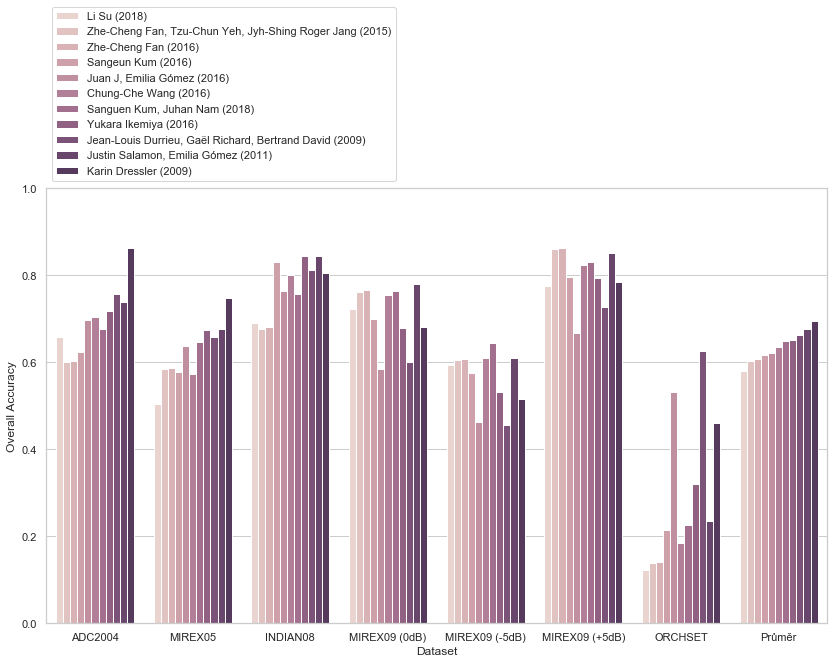

In [3]:
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(14,8)})
sns.set(style="whitegrid")
filtered = data
#filtered = data[(data.Year >= 2015)]
#filtered = data[data.Dataset != "ORCHSET"]

filtered = filtered[data.Contributor_Year_Algo.isin([
    "Karin Dressler (2009), kd",
    "Jean-Louis Durrieu, Gaël Richard, Bertrand David (2009), dr1",
    "Justin Salamon, Emilia Gómez (2011), SG2",
    "Juan J, Emilia Gómez (2016), BG2",
    "Yukara Ikemiya (2016), IIY1",
    "Sanguen Kum, Juhan Nam (2018), KN3",
    "Chung-Che Wang (2016), WFJY1",
    "Juan J, Emilia Gómez (2016), BG2",
    "Sangeun Kum (2016), KON1",
    "Zhe-Cheng Fan (2016), FJ1",
    "Zhe-Cheng Fan, Tzu-Chun Yeh, Jyh-Shing Roger Jang (2015), FYJ1",
    "Li Su (2018), LS1"
])]

mean_datasets = filtered.groupby("Contributor_Year").mean().reset_index()
mean_datasets["Dataset"] = "Průměr"
filtered = pd.concat([filtered, mean_datasets])
#display(filtered)

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    #display(filtered)
order = filtered.groupby("Contributor_Year").mean().reset_index().sort_values(["Overall Accuracy"]).Contributor_Year.unique()
#barplot = sns.barplot(x="Overall Accuracy",y="Contributor_Year_Algo", order=order, data=filtered, estimator=np.mean)

palette = sns.cubehelix_palette(len(order)+2)

barplot = sns.barplot(y="Overall Accuracy", x="Dataset", hue="Contributor_Year", hue_order=order, data=filtered, estimator=np.max, palette=palette)
barplot.set_ylim(0,1)
barplot.legend(loc=2, bbox_to_anchor=(0.0,1.43))

plt.savefig("mirex_results.pdf", bbox_inches="tight")

#for item in barplot.get_xticklabels():
#    item.set_rotation(90)

In [4]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(data)

,Algorithm,Overall Accuracy,Raw Pitch Accuracy,Raw Chroma Accuracy,Voicing Recall Rate,Voicing False-Alarm Rate,Contributors,Dataset,Year,Contributor_Year,Contributor_Year_Algo
0,KN1_Res,0.6916,0.6873,0.7133,0.772100,0.24150,"Sanguen Kum, Juhan Nam",ADC2004,2018,"Sanguen Kum, Juhan Nam (2018)","Sanguen Kum, Juhan Nam (2018), KN1_Res"
1,KN1_Dense,0.7034,0.7178,0.7517,0.828600,0.34110,"Sanguen Kum, Juhan Nam",ADC2004,2018,"Sanguen Kum, Juhan Nam (2018)","Sanguen Kum, Juhan Nam (2018), KN1_Dense"
2,KN3,0.6772,0.6661,0.6954,0.768600,0.22460,"Sanguen Kum, Juhan Nam",ADC2004,2018,"Sanguen Kum, Juhan Nam (2018)","Sanguen Kum, Juhan Nam (2018), KN3"
3,LS1,0.6586,0.6571,0.6673,0.808600,0.32380,Li Su,ADC2004,2018,Li Su (2018),"Li Su (2018), LS1"
4,KN1_Res,0.6285,0.6142,0.6607,0.805900,0.31770,"Sanguen Kum, Juhan Nam",MIREX05,2018,"Sanguen Kum, Juhan Nam (2018)","Sanguen Kum, Juhan Nam (2018), KN1_Res"
5,KN1_Dense,0.6388,0.6640,0.7057,0.883100,0.43430,"Sanguen Kum, Juhan Nam",MIREX05,2018,"Sanguen Kum, Juhan Nam (2018)","Sanguen Kum, Juhan Nam (2018), KN1_Dense"
6,KN3,0.6462,0.6014,0.6228,0.728400,0.20010,"Sanguen Kum, Juhan Nam",MIREX05,2018,"Sanguen Kum, Juhan Nam (2018)","Sanguen Kum, Juhan Nam (2018), KN3"
7,LS1,0.5046,0.5211,0.5489,0.746500,0.48880,Li Su,MIREX05,2018,Li Su (2018),"Li Su (2018), LS1"
8,KN1_Res,0.7666,0.7698,0.7815,0.848400,0.14400,"Sanguen Kum, Juhan Nam",INDIAN08,2018,"Sanguen Kum, Juhan Nam (2018)","Sanguen Kum, Juhan Nam (2018), KN1_Res"
9,KN1_Dense,0.7605,0.7885,0.7947,0.865300,0.29480,"Sanguen Kum, Juhan Nam",INDIAN08,2018,"Sanguen Kum, Juhan Nam (2018)","Sanguen Kum, Juhan Nam (2018), KN1_Dense"


In [5]:
len(data.Contributor_Year.unique())

62

In [6]:

# data = data[(data.Year >= 2009)]
#data = data[(data.Year >= 2009)]
# data = data[data.Contributors == "Liming Song, Ming Li"]
data = data[~data.Algorithm.isin(["LPSL1", "brossier", "HCCPH1", "DD1"])]
data = data[~data.Contributors.isin([
    "I-Bin Liao, Jyh-Shing Roger Jang, Tzu-Chun Yeh", "Tzu-Chun Yeh, Jyh-Shing Roger Jang",
    "Chao-Ling Hsu, Jyh-Shing Roger Jang, Liang-Yu Chen", "Chuan Cao, Ming Li",
    "Tzu-Chun Yeh", "Chris Cannam, Luis Figueira", "Weiwei Zhang, Zhe Chen, Fuliang Yin",
    "Yukara Ikemiya, Katsutoshi Itoyama, Kazuyoshi Yoshii", "Sam Myer", "Liming Song, Ming Li"])]
#data = data[~data.Contributor_Year.isin(["Juan J, Emilia Gómez (2015)", "Liming Song, Ming Li (2014)", "Karin Dressler (2014)", "Justin Salamon, Emilia Gómez (2010)",
#                                        "Sihyun Joo, Seokhwan Jo, Chang D. Yoo (2010)", "Sihyun Joo, Seokhwan Jo, Chang D. Yoo (2009)",
#                                        "Matti Ryynänen, Anssi Klapuri (2005)", "Matti Ryynänen, Anssi Klapuri (2006)"])]
data = data[~data.Contributor_Year_Algo.isin(["Juan J, Emilia Gómez (2016), BG1"])]

#data = data[data.Contributor_Year_Algo.isin([
# "Juan J, Emilia Gómez (2016), BG2",
# ""
#])]
# data = data[data.Contributors.isin(["Justin Salamon, Emilia Gómez"])]


order = data.sort_values(["Year", "Contributors"]).Contributor_Year.unique()


In [7]:
data.groupby(["Contributor_Year_Algo", "Dataset"]).mean().sort_values(["Year", "Contributor_Year_Algo"])

,,Overall Accuracy,Raw Pitch Accuracy,Raw Chroma Accuracy,Voicing Recall Rate,Voicing False-Alarm Rate,Year
Contributor_Year_Algo,Dataset,,,,,,
"Goto, M. (2005), goto",MIREX05,0.4990,0.6580,0.7180,0.9990,0.9940,2005
"Graham Poliner, Daniel P. W. Ellis (2005), poliner",MIREX05,0.6110,0.6730,0.7340,0.9160,0.4270,2005
"Karin Dressler (2005), dressler",MIREX05,0.7140,0.6810,0.7140,0.8180,0.1730,2005
"Marolt, M. (2005), marolt",MIREX05,0.5950,0.6010,0.6710,0.7270,0.3240,2005
"Matti Ryynänen, Anssi Klapuri (2005), ryynanen",MIREX05,0.6430,0.6860,0.7410,0.9030,0.3950,2005
"Paiva, R. (2005), paiva1",MIREX05,0.6110,0.5850,0.6200,0.6880,0.2320,2005
"Paiva, R. (2005), paiva2",MIREX05,0.5780,0.6270,0.6670,0.8340,0.5580,2005
"Vincent, Plumbley (2005), vincent1",MIREX05,0.4715,0.5970,0.6935,0.9785,0.9505,2005
"Christopher Sutton, Emmanuel Vincent, Mark D. Plumbley and Juan P. Bello (2006), sutton",ADC2004,0.5820,0.6260,0.6540,0.7320,0.2490,2006


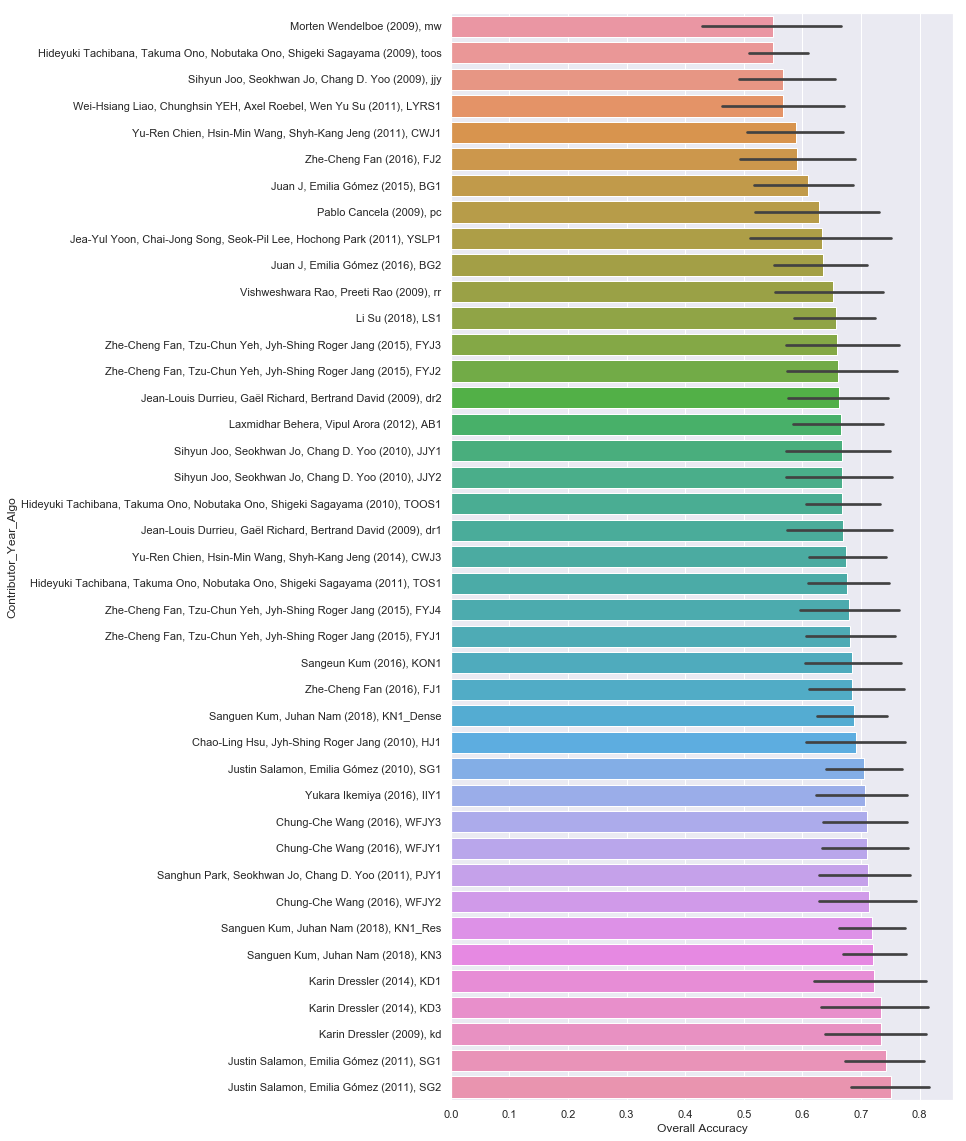

In [8]:
sns.set(rc={'figure.figsize':(9,20)})
#sns.barplot(y="Raw Pitch Accuracy", x="Dataset", hue="Contributor_Year", hue_order=order, data=data, estimator=np.max)
filtered = data[(data.Dataset != "ORCHSET") & (data.Year >= 2009)]
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    display(filtered)
order = filtered.groupby("Contributor_Year_Algo").mean().reset_index().sort_values(["Overall Accuracy"]).Contributor_Year_Algo.unique()
barplot = sns.barplot(x="Overall Accuracy",y="Contributor_Year_Algo", order=order, data=filtered, estimator=np.mean)
#for item in barplot.get_xticklabels():
#    item.set_rotation(90)

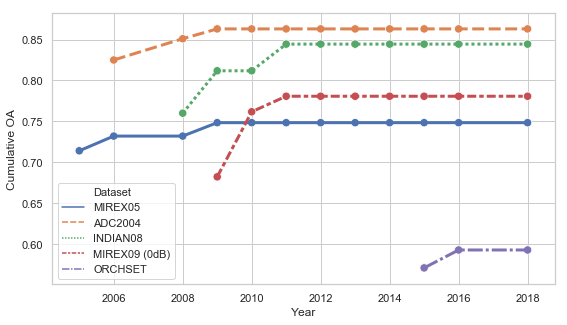

In [27]:
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(9,5)})
sns.set(style="whitegrid")

data = pd.read_csv("MIREX_RESULTS_2005-2018_RAW_DATA.csv")
data = data[data.Dataset != "MIREX09 (-5dB)"]
data = data[data.Dataset != "MIREX09 (+5dB)"]

data["Cumulative OA"] = data.sort_values(["Year"]).groupby(["Dataset"])["Overall Accuracy"].cummax()
plot_data = data.groupby(["Year", "Dataset"]).max().reset_index()
sns.lineplot(y="Cumulative OA", x="Year", hue="Dataset", style="Dataset", data=plot_data, linewidth=3)
# sns.lineplot(y="Overall Accuracy", x="Year", hue="Dataset", data=data.groupby(["Year", "Dataset"]).mean().reset_index(), alpha=0.3)
sns.scatterplot(y="Cumulative OA", x="Year", hue="Dataset", data=plot_data, legend=False, s=70)

plt.savefig("mirex_results_cumulative.pdf", bbox_inches="tight")

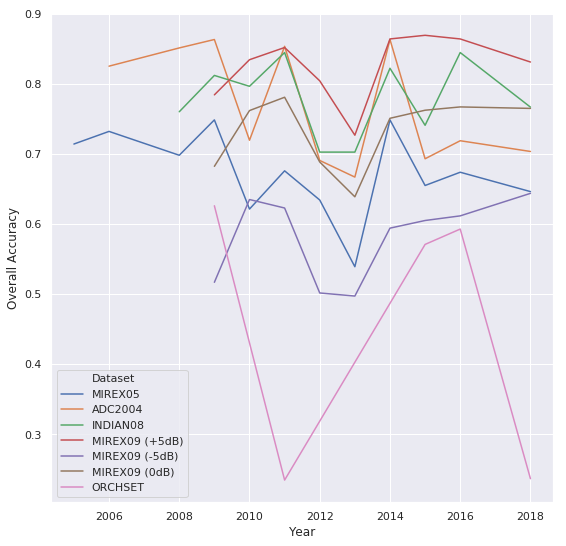

In [63]:
sns.lineplot(y="Overall Accuracy", x="Year", hue="Dataset", data=data.groupby(["Year", "Dataset"]).max().reset_index())

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(pd.DataFrame(data.Contributors.unique()).sort_values(0))

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(data.groupby(["Year", "Contributors"]).mean())

In [ ]:
data.sort_values(["Year", "Contributors"]).Contributors.unique()

In [ ]:
a = data[~data.Algorithm.isin(["LPSL1", "brossier"])].groupby(["Dataset", "Contributors"]).max()["Overall Accuracy"].reset_index()
a[a.Dataset=="ADC2004"].sort_values("Overall Accuracy")